### Required Assignment 5.1: Will the Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaurant near where you are driving. Would you accept that coupon and take a short detour to the restaurant? Would you accept the coupon but use it on a subsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaurant? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\$20 - $50).

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece.





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [163]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [164]:
data = pd.read_csv('C:/Users/thump/OneDrive/Documents/data/coupons.csv')

In [165]:

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  car                   108 non-null    object
 15  Bar                   12577 non-null

2. Investigate the dataset for missing or problematic data.

In [166]:

data.iloc[10:40,10:30]

,has_children,education,occupation,income,car,Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
10,1,Some college - no degree,Unemployed,$37500 - $49999,NaN,never,never,NaN,4~8,1~3,1,0,0,0,1,1
11,1,Some college - no degree,Unemployed,$37500 - $49999,NaN,never,never,NaN,4~8,1~3,1,1,0,0,1,1
12,1,Some college - no degree,Unemployed,$37500 - $49999,NaN,never,never,NaN,4~8,1~3,1,1,0,0,1,1
13,1,Some college - no degree,Unemployed,$37500 - $49999,NaN,never,never,NaN,4~8,1~3,1,0,0,1,0,1
14,1,Some college - no degree,Unemployed,$37500 - $49999,NaN,never,never,NaN,4~8,1~3,1,1,0,0,1,1
15,1,Some college - no degree,Unemployed,$37500 - $49999,NaN,never,never,NaN,4~8,1~3,1,0,0,0,1,0
16,1,Some college - no degree,Unemployed,$37500 - $49999,NaN,never,never,NaN,4~8,1~3,1,1,1,0,1,1
17,1,Some college - no degree,Unemployed,$37500 - $49999,NaN,never,never,NaN,4~8,1~3,1,1,1,0,1,0
18,1,Some college - no degree,Unemployed,$37500 - $49999,NaN,never,never,NaN,4~8,1~3,1,1,0,0,1,1
19,1,Some college - no degree,Unemployed,$37500 - $49999,NaN,never,never,NaN,4~8,1~3,1,0,0,1,0,1


3. Decide what to do about your missing data -- drop, replace, other...

In [167]:

# data = data.drop('car', axis=1)

data['CarryAway'] = data['CarryAway'].fillna(0)

data.iloc[10:40,10:30]
data.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,0,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,0,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,0,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,0,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,0,4~8,1~3,1,1,0,0,1,0


Create and compute a variable to count how many total observations accepted the coupon. Create and compute a variable to count the total number of participants in the study. Compute the proportion of those who chose to accept the coupon in the study. Print the variable out. 

4. What proportion of the total observations chose to accept the coupon?



In [168]:

total_accept = data['Y'].sum()
total_participant = data['Y'].count()
proportion_accept = total_accept / total_participant
print(proportion_accept)


0.5684326710816777


Use seaborn's countplot function to create a bar plot counting each instance of the coupon type being in a particular category - Restaurant (expensive / inexpensive), Coffe House, Take out, Barr

5. Use a bar plot to visualize the `coupon` column.

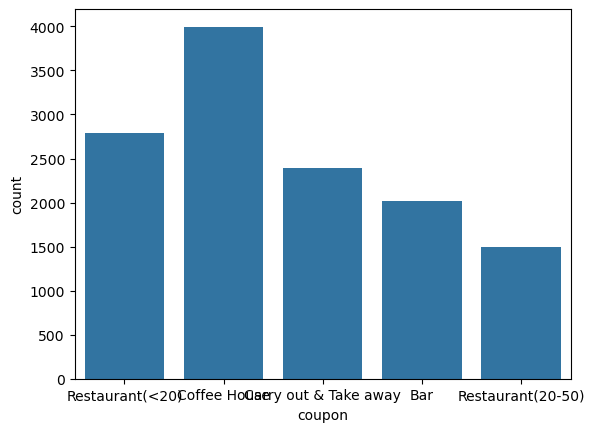

In [169]:

sns.countplot(data = data, x = "coupon")
plt.show()

6. Use a histogram to visualize the temperature column.

Take a look at the data using .loc then use sns.histplot to create a histogram of the data. 

20    55
21    55
22    55
23    80
24    80
25    80
26    80
27    80
28    80
29    80
30    80
31    80
32    55
33    55
34    55
35    55
36    55
37    80
38    55
39    55
40    80
Name: temperature, dtype: int64


<Axes: xlabel='temperature', ylabel='Count'>

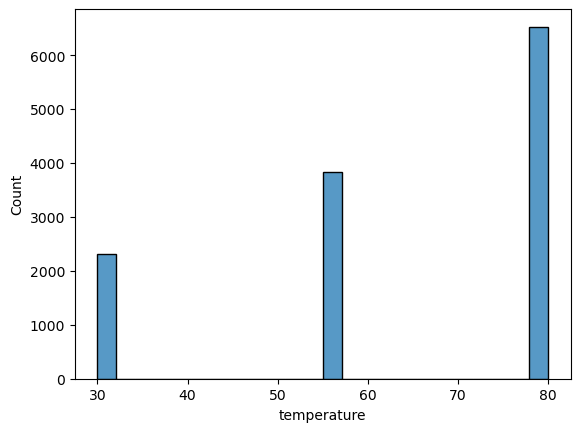

In [170]:
print(data.loc[20:40,"temperature"])
sns.histplot(data = data, x="temperature")

**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


Use double brackets to create a new dataframe, and use "==" to filter for "Bar" under column 'coupon'. 

In [171]:

df2 = data[data['coupon'] == "Bar"]
df2.sample(20)

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
1381,No Urgent Place,Partner,Sunny,80,6PM,Bar,1d,Male,41,Married partner,...,less1,1~3,1~3,less1,1,1,0,0,1,1
3604,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,1d,Female,26,Single,...,less1,less1,1~3,less1,1,0,0,0,1,0
7380,No Urgent Place,Partner,Sunny,30,10AM,Bar,1d,Male,below21,Unmarried partner,...,1~3,1~3,1~3,less1,1,1,0,0,1,0
9542,Home,Alone,Rainy,55,6PM,Bar,1d,Female,below21,Unmarried partner,...,1~3,less1,1~3,less1,1,1,1,0,1,1
10008,Work,Alone,Rainy,55,7AM,Bar,1d,Female,36,Divorced,...,less1,1~3,less1,never,1,1,1,0,1,0
4493,Home,Alone,Sunny,80,10PM,Bar,1d,Female,26,Single,...,less1,1~3,4~8,never,1,1,0,1,0,0
10827,No Urgent Place,Friend(s),Sunny,80,10PM,Bar,1d,Male,21,Single,...,gt8,4~8,1~3,less1,1,1,0,0,1,1
1430,Work,Alone,Sunny,55,7AM,Bar,1d,Female,36,Married partner,...,gt8,4~8,1~3,less1,1,1,1,0,1,0
12417,No Urgent Place,Friend(s),Sunny,80,10PM,Bar,1d,Male,31,Married partner,...,less1,4~8,1~3,4~8,1,1,0,0,1,1
1452,Work,Alone,Sunny,55,7AM,Bar,1d,Female,46,Single,...,never,1~3,less1,less1,1,1,1,0,1,0


Create a variable that counts the number of accepted bar coupons, using the dataframe filtered for bar coupons. Create a variable tracking the total number of bar coupons. Then compute the ratio. 

2. What proportion of bar coupons were accepted?


In [172]:
bar_coupon_acc = df2['Y'].sum()
bar_coupon_tot = df2['Y'].count()
proport_barcoupon_acc = bar_coupon_acc / bar_coupon_tot
print(proport_barcoupon_acc)

0.41001487357461575


3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


There are a total of 257 + 253+ 156 = 666 people who went to a bar 3 times or less and accepted the coupon vs 397+570+830 = 1797 people who went to a bar 3 times or less in total. the acceptance rate in this population is 666 / 1797 = 37%

There are 117 people who went to a bar 4-8 times a month and accepted, and 36 who did so greater than 8 times a month and accepted. There were a total of 150 people who went to a bar 4-8 times a month and 49 people who went to a bar greater than 8 times a month. The acceptance rate for those who went to a bar more than 3 times a month, therefore, is (117+36)/(150 + 49) = 153 / 199 = 76.9%. Therefore, those who went to a bar more than 3 times seem to be accepting the bar coupon more. 

In [173]:
#df2.iloc[50:80,5:20]
print(df2.groupby('Bar')['Y'].sum())
print(df2['Y'].sum())
print(df2.groupby('Bar').count())
153 / 199
257+253+156
397+570+830
666/1797

Bar
1~3      257
4~8      117
gt8       36
less1    253
never    156
Name: Y, dtype: int64
827
       destination  passanger  weather  temperature  time  coupon  expiration  \
Bar                                                                             
1~3            397        397      397          397   397     397         397   
4~8            150        150      150          150   150     150         150   
gt8             49         49       49           49    49      49          49   
less1          570        570      570          570   570     570         570   
never          830        830      830          830   830     830         830   

       gender  age  maritalStatus  ...  CoffeeHouse  CarryAway  \
Bar                                ...                           
1~3       397  397            397  ...          394        397   
4~8       150  150            150  ...          147        150   
gt8        49   49             49  ...           49         49   
less1  

0.37061769616026713

4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


The population of drivers who go to a bar more than once a month and are over the age of 25 has an acceptance rate of the coupon of 68.18%. That is significantly higher to the overall acceptance rate of 41%. 

In [182]:
#Analyze the dataframe before proceeding
df2['age'].sample(25)
#remove "plus" after certain age categories to clean the data
df2['age'] = df2['age'].str.replace(r"plus$", '', regex=True)
#remove "below" from certain age categories to clean the data
df2['age'] = df2['age'].str.replace(r"below",'',regex = True)
#with the data cleaned, convert to type integer, so that age can be queried and filtered properly
df2['age'] = pd.to_numeric(df2['age'], errors = "coerce")
#create a cataframe of those with bar coupons filtered for over 25
over_25 = df2.query('age > 25')
#filter the dataframe for those going to the bar less than 1 time
over_25_less1 = over_25.query('Bar == "less1"')
over_25_never = over_25.query('Bar == "never"')
#the population over 25 that goes to the bar more than 1 times
over_25_more1 = over_25['Y'].count() - over_25_less1['Y'].count() - over_25_never['Y'].count()
print(over_25_more1)
#the population over 25 that goes to the bar more than 1 times and accepts the coupon
over_25_more1_acc =  over_25['Y'].sum() - over_25_less1['Y'].sum() - over_25_never['Y'].sum()
print(over_25_more1_acc)
#calculate the acceptance rate of the coupon among those over 25 who go to the bar more than 1 time
ratio_over25_more1 = over_25_more1_acc / over_25_more1
print(ratio_over25_more1)

440
300
0.6818181818181818


C:\Users\thump\AppData\Local\Temp\ipykernel_36244\2089969414.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['age'] = df2['age'].str.replace(r"plus$", '', regex=True)
C:\Users\thump\AppData\Local\Temp\ipykernel_36244\2089969414.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['age'] = df2['age'].str.replace(r"below",'',regex = True)
C:\Users\thump\AppData\Local\Temp\ipykernel_36244\2089969414.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try

5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry.


The acceptance rate of this population is 71.3%, much higher than the general population's acceptance rate and even higher than simply driver who go to the bar more than 1 time. 

In [181]:
#query the data and create a dataframe filtering for those who go to the bar more than 1 time
df2_morebar = df2.query('Bar == "1~3" | Bar == "4~8" | Bar == "gt8"')
#look at the data, understand it
df2_morebar.iloc[20:40, 1:10]
#filter further to create a dataframe with no kids as passangers
morebar_nokids = df2_morebar.query('passanger == "Alone" | passanger == "Friend(s)" | passanger == "Partner"')
#look at new dataframe
morebar_nokids.iloc[20:40, 10:20]
#filter for no fishing, forestry, or farming occupations even though the dataframe already doesn't include those occupations
mobar_nokid_nooutdoor1 = morebar_nokids.query("~(occupation =='farming')")
mobar_nokid_nooutdoor2 = mobar_nokid_nooutdoor1.query("~(occupation =='fishing')")
mobar_nokid_nooutdoor = mobar_nokid_nooutdoor2.query("~(occupation =='forestry')")
#look at the data
mobar_nokid_nooutdoor.iloc[10:20,10:20]
mobar_nokid_nooutdoor.count()
#make sure occupations filtered out correctly
distinct_values = mobar_nokid_nooutdoor['occupation'].unique()
print(distinct_values)
distinct_valuesold = morebar_nokids['occupation'].unique()
print(distinct_valuesold)
#create variables for accepted coupons in this population, total population size, and calculate acceptance rate
mobar_nk_acc = mobar_nokid_nooutdoor['Y'].sum()
mobar_nk_tot = mobar_nokid_nooutdoor['Y'].count()
mobar_nk_ratio = mobar_nk_acc / mobar_nk_tot
print(mobar_nk_ratio)

['Student' 'Healthcare Support' 'Management' 'Unemployed'
 'Sales & Related' 'Office & Administrative Support'
 'Construction & Extraction' 'Legal' 'Life Physical Social Science'
 'Retired' 'Computer & Mathematical'
 'Healthcare Practitioners & Technical' 'Personal Care & Service'
 'Architecture & Engineering' 'Arts Design Entertainment Sports & Media'
 'Protective Service' 'Business & Financial'
 'Food Preparation & Serving Related' 'Installation Maintenance & Repair'
 'Education&Training&Library' 'Community & Social Services'
 'Production Occupations' 'Transportation & Material Moving'
 'Building & Grounds Cleaning & Maintenance']
['Student' 'Healthcare Support' 'Management' 'Unemployed'
 'Sales & Related' 'Office & Administrative Support'
 'Construction & Extraction' 'Legal' 'Life Physical Social Science'
 'Retired' 'Computer & Mathematical'
 'Healthcare Practitioners & Technical' 'Personal Care & Service'
 'Architecture & Engineering' 'Arts Design Entertainment Sports & Media'
 'Pr

6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K.



Acceptance rate, as calculated in the code below, for those who go to bars more than once a month, had passengers that were not a kid, and were not widowed, was 71.3%. 

Acceptance rate, as calculated in the code below, for those who go to bars more than once a month and are under the age of 30 was 72.2%. 

Acceptance rate, as calculated in the code below, for those who go to cheap restaurants more than 4 times a month and whose income is less than 50k is 45.8%. 

In [241]:
#query the data and create a dataframe filtering for those who go to the bar more than 1 time
df2_moba = df2.query('Bar == "1~3" | Bar == "4~8" | Bar == "gt8"')
#look at the data, understand it
df2_moba.iloc[20:40, 1:10]
#filter further to create a dataframe with no kids as passengers
moba_nokids = df2_moba.query('passanger == "Alone" | passanger == "Friend(s)" | passanger == "Partner"')
#look at new dataframe
moba_nokids.head(20)
#filter further to create a dataframe for those not widowed
moba_nokids_nowid = moba_nokids.query("~(maritalStatus=='widowed')")
#create variables for accepted coupons in this population, total population size, and calculate acceptance rate
mobar_nknw_acc = moba_nokids_nowid['Y'].sum()
mobar_nknw_tot = moba_nokids_nowid['Y'].count()
mobar_nknw_ratio = mobar_nknw_acc / mobar_nknw_tot
print(mobar_nknw_ratio)

#filter to create a dataframe with those who go to the bar more than 1 time and are under 30
moba_young = df2_moba.query('age<30')
#create variables for accepted coupons in this population, total population size, and calculate the acceptance ratio
moba_young_acc = moba_young['Y'].sum()
moba_young_tot = moba_young['Y'].count()
moba_young_ratio = moba_young_acc / moba_young_tot
print(moba_young_ratio)

#filter to create a dataframe with those who go to cheap restaurants more than 4 times a month and have income less than 50k
df2.sample(30)
cheap_rest = df2.query('RestaurantLessThan20 == "gt8" | RestaurantLessThan20 == "4~8"')
#print(cheap_rest.iloc[10:20, 10:20])
#filter further for those with income less than 50k
cheap_rest['income'] = cheap_rest['income'].str.slice(0,7)
print(cheap_rest.iloc[30:50,10:20])
#cheap_rest_lowin = cheap_rest.query('income ==$37500 | income == "$25000 - $37499"| income =="$12500 - $24999"|income == "Less than $12500"')
cheap_rest['income'] = cheap_rest['income'].str.strip()
cheap_rest_lowin = cheap_rest[(cheap_rest['income'] == '$37500') | (cheap_rest['income'] == '$25000') | (cheap_rest['income'] == '$12500')]
cheap_rest_lowin.iloc[20:40,10:20]\
#create variables for accepted coupons in this population, total population size, and calculate the acceptance ratio
cheap_rest_lowin_acc = cheap_rest_lowin['Y'].sum()
cheap_rest_lowin_tot = cheap_rest_lowin['Y'].count()
cheap_rest_lowin_ratio = cheap_rest_lowin_acc / cheap_rest_lowin_tot
print(cheap_rest_lowin_ratio)

0.7132486388384754
0.7217391304347827
      has_children                               education  \
752              0                Some college - no degree   
755              0                Some college - no degree   
756              0                Some college - no degree   
760              0                Some college - no degree   
767              0  Graduate degree (Masters or Doctorate)   
778              0  Graduate degree (Masters or Doctorate)   
782              0  Graduate degree (Masters or Doctorate)   
926              0  Graduate degree (Masters or Doctorate)   
937              0  Graduate degree (Masters or Doctorate)   
941              0  Graduate degree (Masters or Doctorate)   
955              0                        Bachelors degree   
958              0                        Bachelors degree   
959              0                        Bachelors degree   
963              0                        Bachelors degree   
977              1  Graduate deg

C:\Users\thump\AppData\Local\Temp\ipykernel_36244\1914173843.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cheap_rest['income'] = cheap_rest['income'].str.slice(0,7)
C:\Users\thump\AppData\Local\Temp\ipykernel_36244\1914173843.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cheap_rest['income'] = cheap_rest['income'].str.strip()


7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

In [ ]:
Drivers who accepted the bar coupons seem to primarily be those drivers who go to bars a lot and have fewer family obligations. 

### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  